# Import Library

In [11]:
seed=42
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from imblearn.over_sampling import SMOTE 
import seaborn as sns
np.random.seed(seed)


# Load data

Original dataset shape Counter({1: 357, 0: 212})


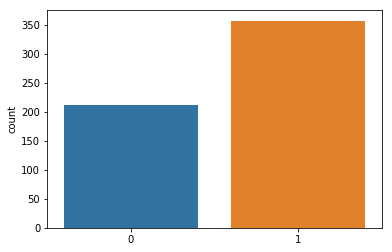

In [14]:
X, y = load_breast_cancer(return_X_y=True)
print('Original dataset shape {}'.format(Counter(y)))
#Samples per class	212(Malignant),357(Benign)
sns_plot1 = sns.countplot(y)
fig1 = sns_plot1.get_figure()
fig1.savefig('Y_label.png')

# Preprocessing
## Spilt the Dataset

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

## Oversampling

Oversampled Dataset Counter({0: 249, 1: 249})


c:\users\raktim\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\raktim\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


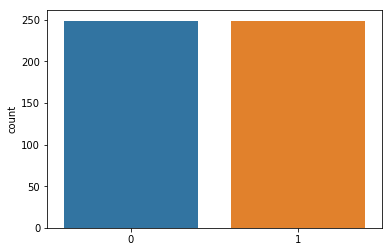

In [19]:
sm = SMOTE(ratio=1, random_state=seed, kind='borderline1')
x_train, y_train = sm.fit_sample(x_train, y_train)
x_test, y_test = sm.fit_sample(x_test, y_test)
print('Oversampled Dataset {}'.format(Counter(y_train)))
sns_plot1 = sns.countplot(y_train)
fig1 = sns_plot1.get_figure()
fig1.savefig('Y_train_label.png')

# Reduce Dimension

In [9]:
pca = PCA(n_components=2, random_state=seed)
pca.fit(x_train, y_train)
x_train = pca.transform(x_train)
print ('After PCA', x_train.shape)
x_test = pca.transform(x_test)

After PCA (498, 2)


# Plot Graph

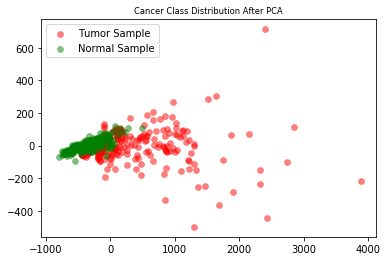

In [10]:
plt.plot()
colors = ['red', 'green']
target_names=['Tumor Sample', 'Normal Sample']
lw = 0.5

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_train[y_train == i, 0], x_train[y_train == i, 1], color=color, alpha=.5, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title("Cancer Class Distribution After PCA", fontsize='small')
plt.savefig('class_distribution_after_pca.eps', format='eps', dpi=2500)
plt.show()